<h1>C964 Capstone Project</h1>

In [76]:
import pandas as pd
import numpy as np
import ipywidgets as widget
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import yfinance as yf

In [57]:
def dropdownFunc(Stock):
    return Stock

dropdown = widget.interactive(dropdownFunc, Stock=['AAPL', 'AMD', 'AMZN', 'ATVI', 'BABA', 'BAC', 'CRM', 'CSCO', 'DIS', 'EA', 'F', 'GOOG', 'INTC', 'JPM', 'KO', 'MCD', 'META', 'MSFT', 'MTCH', 'NFLX', 'NVDA', 'PFE', 'PYPL', 'T', 'TSLA','TTD','WMT','XOM','YELP','ZG'])
display(dropdown)

interactive(children=(Dropdown(description='Stock', options=('AAPL', 'AMD', 'AMZN', 'ATVI', 'BABA', 'BAC', 'CR…

<p style="font-size: larger">Use the combo box above to select the stock you are interested in analyzing.


</p>

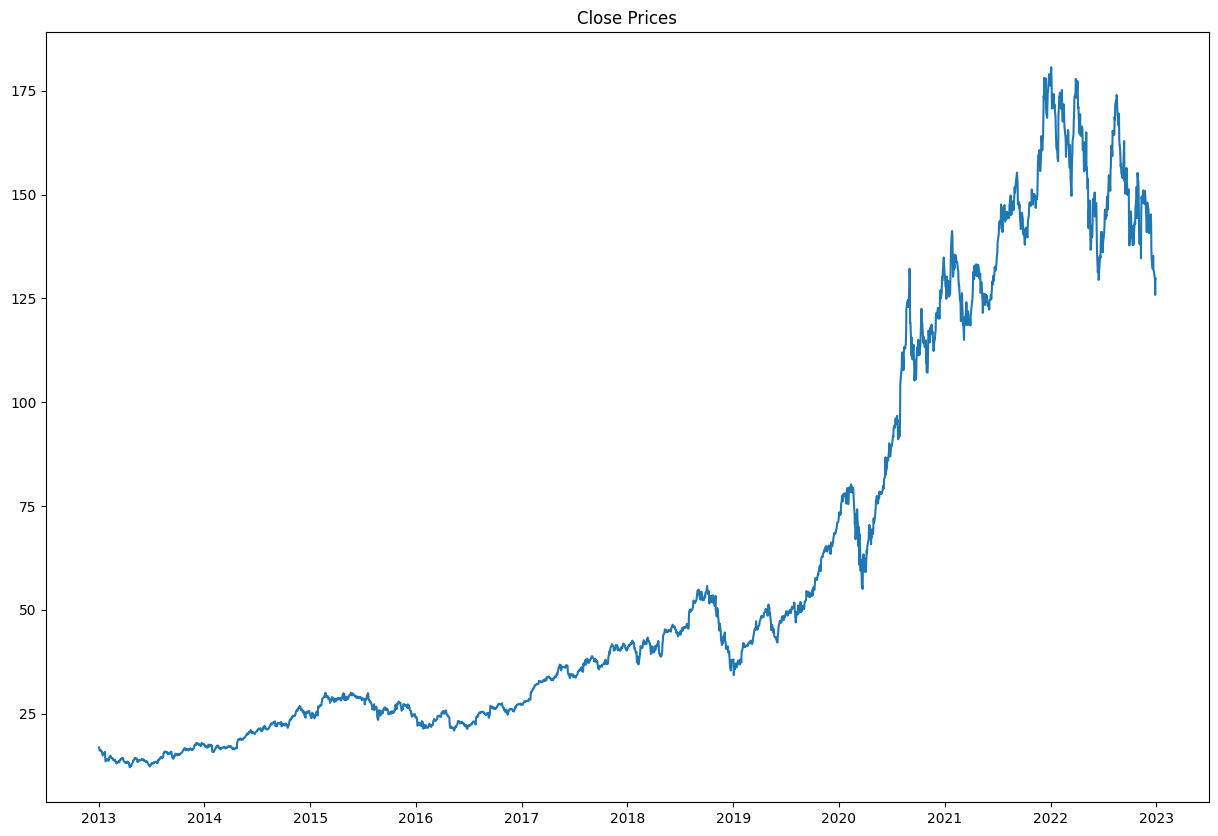

In [84]:
start = '2013-01-01'
end = '2022-12-31'

ticker = yf.Ticker(dropdown.result)
df = ticker.history(start=start, end=end)
dates = df.index
close_values = df.Close
plt.figure(figsize=(15,10))
plt.plot(close_values)
plt.title("Close Prices")
plt.savefig("close_prices.jpg")




Above we simply plotted the open prices of the stock. Below we will split the data into our training data and our test data.

In [85]:
prediction_days = 60

scaler = MinMaxScaler(feature_range=(0,1))
close_data = df['Close']
training_close_data = close_data[:len(close_data)-prediction_days]
scaled_data = scaler.fit_transform(close_data.values.reshape(-1,1))


x_train = []
y_train = []

for i in range (prediction_days,len(scaled_data)):
    x_train.append(scaled_data[i-prediction_days:i,0])
    y_train.append(scaled_data[i,0])

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))


In [86]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
77/77 [==============================] - 8s 55ms/step - loss: 0.0128
Epoch 2/100
77/77 [==============================] - 4s 56ms/step - loss: 0.0029
Epoch 3/100
77/77 [==============================] - 4s 58ms/step - loss: 0.0024
Epoch 4/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0023
Epoch 5/100
77/77 [==============================] - 4s 58ms/step - loss: 0.0019
Epoch 6/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0021
Epoch 7/100
77/77 [==============================] - 5s 65ms/step - loss: 0.0031
Epoch 8/100
77/77 [==============================] - 5s 64ms/step - loss: 0.0023
Epoch 9/100
77/77 [==============================] - 5s 61ms/step - loss: 0.0022
Epoch 10/100
77/77 [==============================] - 5s 60ms/step - loss: 0.0018
Epoch 11/100
77/77 [==============================] - 5s 68ms/step - loss: 0.0020
Epoch 12/100
77/77 [==============================] - 5s 62ms/step - loss: 0.0018
Epoch 13/100
77/77 [=====

KeyboardInterrupt: 

In [87]:
test_size = 21

test_close_data = close_data[len(close_data)-test_size:]
test_dates = dates[len(close_data)-test_size:]

inputs = close_data[len(close_data)-len(test_close_data)-prediction_days:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

x_test = []

for i in range (prediction_days,len(inputs)):
    x_test.append(inputs[i-prediction_days:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_stock_prices = regressor.predict(x_test)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)


1/1 [==============================] - 1s 844ms/step


Mean absolute error: 3.377503894624256
|          Dates            | Actual Prices  |   Predicted Prices   |
| 2022-12-01 00:00:00-05:00 |   [141.4374]   |  148.08389282226562  |
| 2022-12-02 00:00:00-05:00 |  [141.34325]   |  147.58465576171875  |
| 2022-12-05 00:00:00-05:00 |  [141.17003]   |  146.40646362304688  |
| 2022-12-06 00:00:00-05:00 |  [140.95845]   |   142.692138671875   |
| 2022-12-07 00:00:00-05:00 |  [140.69678]   |  140.7251434326172   |
| 2022-12-08 00:00:00-05:00 |   [140.3524]   |  142.43252563476562  |
| 2022-12-09 00:00:00-05:00 |  [139.92764]   |  141.9432830810547   |
| 2022-12-12 00:00:00-05:00 |  [139.43831]   |  144.2697296142578   |
| 2022-12-13 00:00:00-05:00 |  [138.93507]   |  145.24822998046875  |
| 2022-12-14 00:00:00-05:00 |  [138.47742]   |  142.99168395996094  |
| 2022-12-15 00:00:00-05:00 |  [138.08574]   |  136.29190063476562  |
| 2022-12-16 00:00:00-05:00 |  [137.69408]   |   134.304931640625   |
| 2022-12-19 00:00:00-05:00 |  [137.22331]   |  132

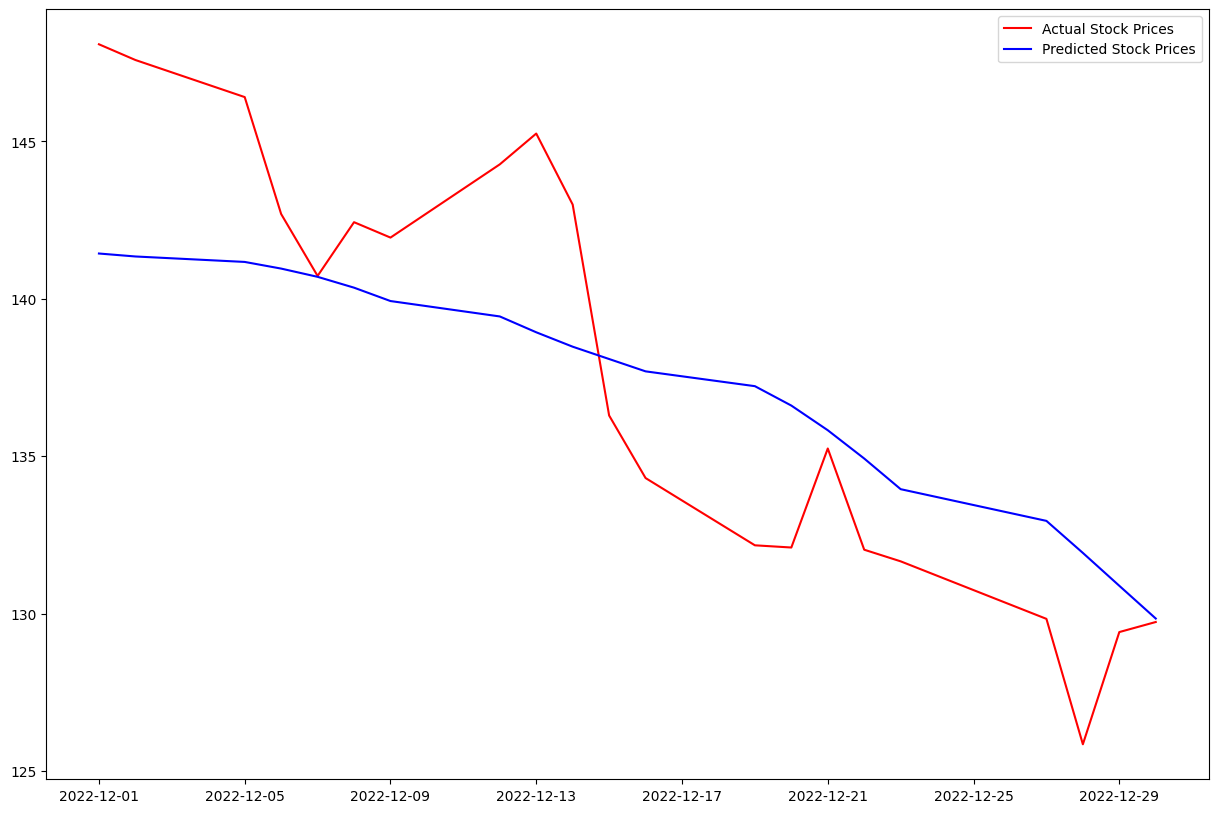

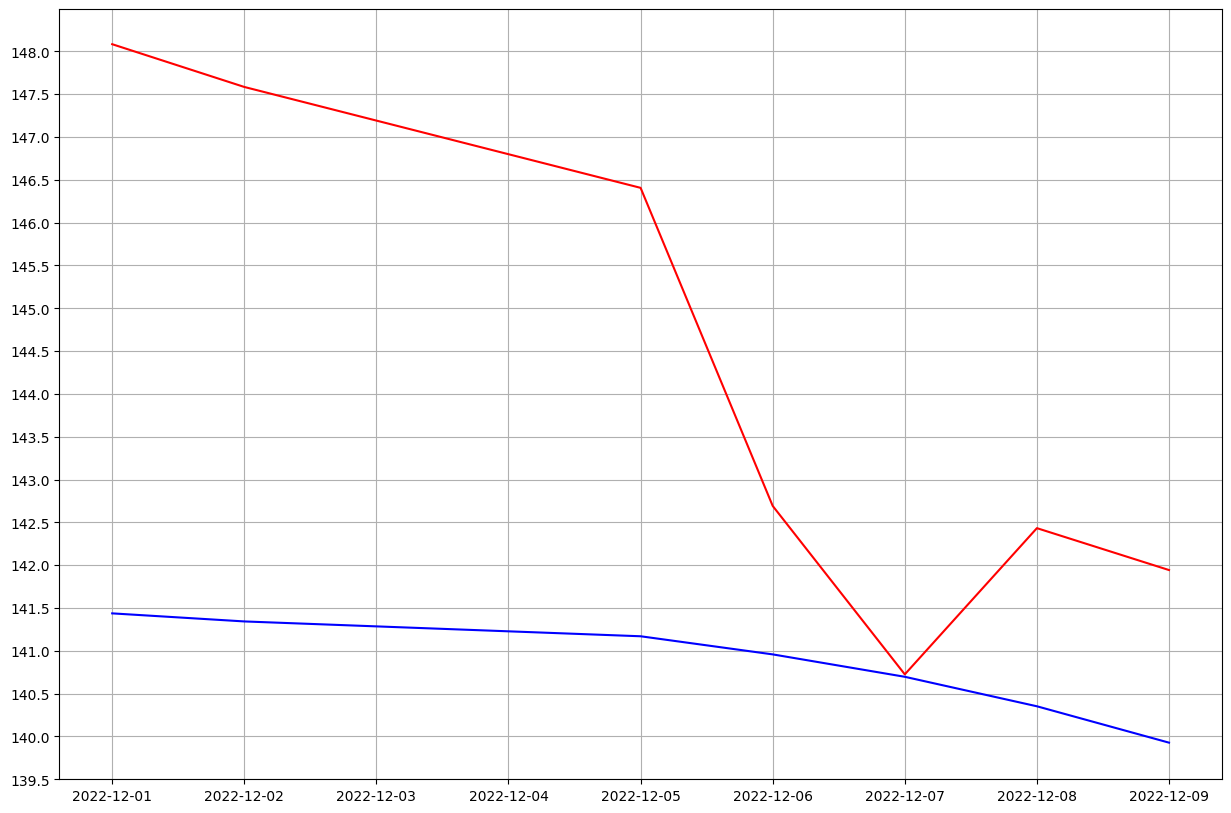

In [124]:
actual_stock_prices = test_close_data.values

plt.figure(figsize=(15,10))
plt.plot(test_dates, actual_stock_prices, color='red', label = "Actual Stock Prices")
plt.plot(test_dates, predicted_stock_prices, color='blue', label = "Predicted Stock Prices")
plt.legend()

plt.figure(figsize=(15,10))
plt.grid()
plt.plot(test_dates[:7], actual_stock_prices[:7], color='red', label = "Actual Stock Prices")
plt.plot(test_dates[:7], predicted_stock_prices[:7], color='blue', label = "Predicted Stock Prices")

plt.yticks(np.arange(139.5, 148.5, step = 0.5))

print("Mean absolute error: " + str(mean_absolute_error(actual_stock_prices, predicted_stock_prices)))

fmt = '| {:6s} | {:^14} | {:^20} |'
print ("|          Dates            | Actual Prices  |   Predicted Prices   |")
for date,predicted,actual in zip(test_dates,predicted_stock_prices,actual_stock_prices):
    print(fmt.format(str(date), str(predicted), str(actual)))
    

